Importing the necassary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importing the dataset

In [3]:

aviation_df = pd.read_csv('AviationData.csv', encoding="ISO-8859-1", low_memory=False)
state_codes_df = pd.read_csv ('USState_Codes.csv' , encoding="ISO-8859-1", low_memory=False)

Identifying the number of rows and columns in the dataset





In [4]:
aviation_df.shape

(88889, 31)

Analyzing the dataset

In [5]:
aviation_df.describe() #checking summary stastics

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [6]:
aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [7]:
#The data set has a total of 31 columns. The Event.Id,Investigation.Type,Accident.Number and Event.Date do not have any missing data.

Working on missing data

In [8]:
aviation_df.isnull()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True,True,...,False,True,False,True,True,True,False,False,False,False
3,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,False,False,False,False,False,False,True,True,True,True,...,False,True,False,False,False,False,True,True,True,False
88885,False,False,False,False,False,False,True,True,True,True,...,True,True,False,False,False,False,True,True,True,True
88886,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,True,True,False
88887,False,False,False,False,False,False,True,True,True,True,...,False,False,False,False,False,False,True,True,True,True


In [9]:
state_codes_df.isna().sum() 

US_State        0
Abbreviation    0
dtype: int64

In [10]:
aviation_df.isna().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [11]:
aviation_df = aviation_df.dropna(subset=['Latitude', 'Longitude'])
aviation_df.isna().sum() #Checking whether latitude and longitude has been dropped.

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      5
Country                       1
Latitude                      0
Longitude                     0
Airport.Code              12074
Airport.Name              11813
Injury.Severity             233
Aircraft.damage             944
Aircraft.Category          8414
Registration.Number         446
Make                         22
Model                        28
Amateur.Built                31
Number.of.Engines          2228
Engine.Type                4317
FAR.Description            8515
Schedule                  31410
Purpose.of.flight          3301
Air.carrier               21652
Total.Fatal.Injuries       9244
Total.Serious.Injuries    10125
Total.Minor.Injuries       9605
Total.Uninjured            4713
Weather.Condition          1736
Broad.phase.of.flight     22882
Report.Status              3996
Publication.Date            605
dtype: i

In [12]:
#Filling missing data for Weather.Condition ,Aircraft.damage and Broad.phase.of.flight with unknown
aviation_df["Weather.Condition"] = aviation_df["Weather.Condition"].fillna("Unknown")
aviation_df["Aircraft.damage"] = aviation_df["Aircraft.damage"].fillna("Unknown")
aviation_df["Broad.phase.of.flight"] = aviation_df["Broad.phase.of.flight"].fillna("Unknown")



In [13]:
aviation_df.isna().sum() 

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      5
Country                       1
Latitude                      0
Longitude                     0
Airport.Code              12074
Airport.Name              11813
Injury.Severity             233
Aircraft.damage               0
Aircraft.Category          8414
Registration.Number         446
Make                         22
Model                        28
Amateur.Built                31
Number.of.Engines          2228
Engine.Type                4317
FAR.Description            8515
Schedule                  31410
Purpose.of.flight          3301
Air.carrier               21652
Total.Fatal.Injuries       9244
Total.Serious.Injuries    10125
Total.Minor.Injuries       9605
Total.Uninjured            4713
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status              3996
Publication.Date            605
dtype: i

In [14]:
injury_columns = ["Total.Fatal.Injuries", "Total.Serious.Injuries", "Total.Minor.Injuries", "Total.Uninjured"]
aviation_df[injury_columns] = aviation_df[injury_columns].fillna("false")


In [15]:
aviation_df.isna().sum() 

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      5
Country                       1
Latitude                      0
Longitude                     0
Airport.Code              12074
Airport.Name              11813
Injury.Severity             233
Aircraft.damage               0
Aircraft.Category          8414
Registration.Number         446
Make                         22
Model                        28
Amateur.Built                31
Number.of.Engines          2228
Engine.Type                4317
FAR.Description            8515
Schedule                  31410
Purpose.of.flight          3301
Air.carrier               21652
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status              3996
Publication.Date            605
dtype: i

In [16]:
engine_columns = ["Number.of.Engines" ,"Engine.Type"]
aviation_df["Number.of.Engines"] = aviation_df["Number.of.Engines"].fillna(0)  # Fill with 0 since it's a numeric column
aviation_df["Engine.Type"] = aviation_df["Engine.Type"].fillna("Unknown")


In [17]:
aviation_df.isna().sum() 

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                      5
Country                       1
Latitude                      0
Longitude                     0
Airport.Code              12074
Airport.Name              11813
Injury.Severity             233
Aircraft.damage               0
Aircraft.Category          8414
Registration.Number         446
Make                         22
Model                        28
Amateur.Built                31
Number.of.Engines             0
Engine.Type                   0
FAR.Description            8515
Schedule                  31410
Purpose.of.flight          3301
Air.carrier               21652
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
Report.Status              3996
Publication.Date            605
dtype: i

In [18]:
#Dropping the rest of the columns with missing data.
aviation_df = aviation_df.dropna() 


In [19]:
#Clean data
aviation_df.isna().sum() 





Event.Id                  0
Investigation.Type        0
Accident.Number           0
Event.Date                0
Location                  0
Country                   0
Latitude                  0
Longitude                 0
Airport.Code              0
Airport.Name              0
Injury.Severity           0
Aircraft.damage           0
Aircraft.Category         0
Registration.Number       0
Make                      0
Model                     0
Amateur.Built             0
Number.of.Engines         0
Engine.Type               0
FAR.Description           0
Schedule                  0
Purpose.of.flight         0
Air.carrier               0
Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Weather.Condition         0
Broad.phase.of.flight     0
Report.Status             0
Publication.Date          0
dtype: int64

In [22]:
aviation_df.columns = aviation_df.columns.str.replace(" ", "_").str.lower()  ##(remove spaces and converts to lowercase)


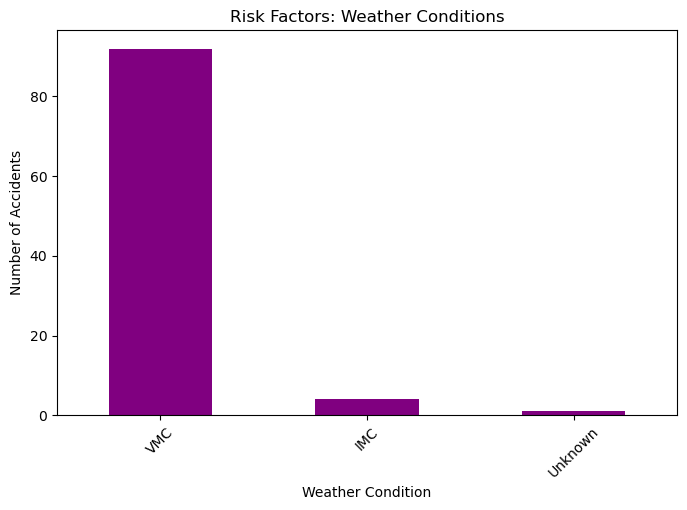

In [30]:
plt.figure(figsize=(8, 5))
aviation_df["weather.condition"].value_counts().plot(kind="bar", color="purple")
plt.title("Risk Factors: Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)

plt.show()

 Weather conditions ( IMC, VMC) play a role in accidents.

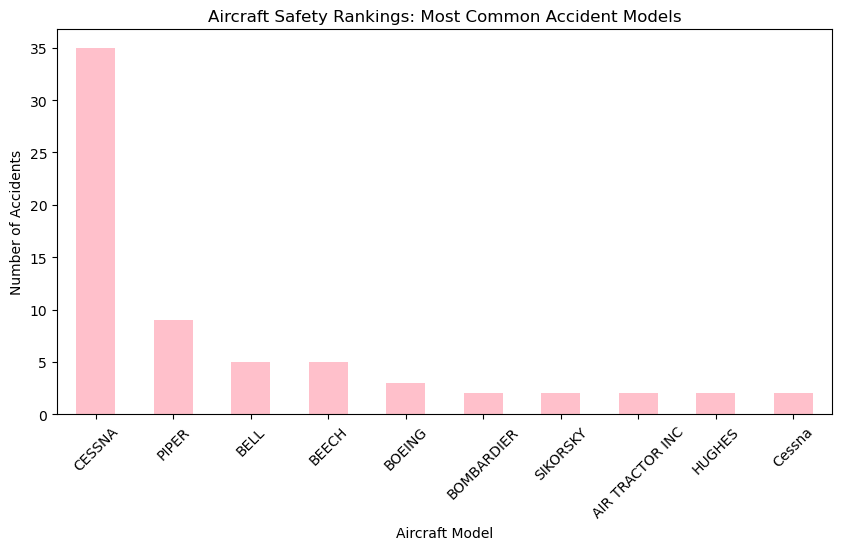

In [33]:
plt.figure(figsize=(10, 5))
aviation_df["make"].value_counts().head(10).plot(kind="bar", color="pink")
plt.title("Aircraft Safety Rankings: Most Common Accident Models")
plt.xlabel("Aircraft Model")
plt.ylabel("Number of Accidents")
plt.xticks(rotation=45)

plt.show()

In [34]:
flight_phase_counts = aviation_df["broad.phase.of.flight"].value_counts()
